In [550]:
import sqlite3
import sys
sys.path.append("..")
import json
from Visualization.bookmakers import get_bookmakers_coef
con = sqlite3.connect('../data/on_court.db')
cursor = con.cursor()
from matplotlib import pyplot as plt
%matplotlib inline
# cursor.execute("SELECT * FROM sqlite_master")

In [3]:
import sqlite3
con = sqlite3.connect('../data/on_court.db')
cursor = con.cursor()

In [96]:
from Visualization.bookmakers import get_bookmakers_coef

In [30]:
import pandas as pd

In [32]:
pd.read_csv('../data/games_atp.csv').head()

,ID1_G,ID2_G,ID_T_G,ID_R_G,RESULT_G,DATE_G
0,115,105,1,12,6-2 6-1,NaN
1,35,223,1,4,7-5 6-1,NaN
2,61,110,1,4,6-4 6-3,NaN
3,275,181,1,4,4-6 6-4 6-4,NaN
4,105,103,1,4,6-3 3-6 6-3,NaN


In [4]:
con = sqlite3.connect('../data/on_court.db')
cursor = con.cursor()

In [5]:
import numpy as np
from trueskill import Rating, rate_1vs1

In [45]:
from math import sqrt
from trueskill import BETA
from trueskill.backends import cdf

def win_probability(player_rating, opponent_rating):
    delta_mu = player_rating.mu - opponent_rating.mu
    denom = sqrt(2 * (BETA * BETA) + pow(player_rating.sigma, 2) + pow(opponent_rating.sigma, 2))
    return cdf(delta_mu / denom)

In [46]:
query = 'select * from games_atp '
query = query.format(id1_=1, win_=1, court_=1)
games = np.array(cursor.execute(query).fetchall())

In [47]:
max_id = max(games[:, 0].max(), games[:, 1].max()) + 1

In [48]:
ratings = [Rating() for i in range(max_id)]

In [49]:
import progressbar

In [50]:
bar = progressbar.ProgressBar(max_value=len(games))

In [51]:
for ii, i in enumerate(games[:int(len(games) * 0.9)]):
    bar.update(ii)
    ratings[i[0]], ratings[i[1]] = rate_1vs1(ratings[i[0]], ratings[i[1]])

 89% (604672 of 671964) |###################################    | Elapsed Time: 0:04:37 ETA: 0:00:29

In [52]:
games[int(len(games) * 0.9):]

array([[43280, 52550, 13203, 1, '6-4 6-1', None],
       [52552, 30865, 13203, 1, '6-4 3-6 6-3', None],
       [31217, 52768, 13203, 1, '6-0 6-0', None],
       ..., 
       [14749, 23753, 14161, 4, '6-3 6-3', '04/26/17 00:00:00'],
       [37577, 25818, 14161, 4, '6-4 6-2', '04/26/17 00:00:00'],
       [46720, 39047, 14161, 4, '4-6 6-2 6-1', '04/26/17 00:00:00']], dtype=object)

In [53]:
y_pred = []
for g in test_games:
    y_pred.append(win_probability(ratings[g[0]], ratings[g[1]]))
    y_pred.append(win_probability(ratings[g[1]], ratings[g[0]]))

In [61]:
from sklearn.metrics import roc_auc_score, accuracy_score

In [55]:
len(y_pred)

268786

In [56]:
roc_auc_score([1., 0] * len(test_games), y_pred)

0.78613104877281703

In [59]:
def get_classes(probs, th):
    return [int(i > th) for i in probs]

In [91]:
[i for i in games if i[-1] is not None]

[array([85, 89, 488, 12, '6-4 7-5', '08/04/02 00:00:00'], dtype=object),
 array([7, 612, 496, 4, '6-0 6-0', '08/06/02 00:00:00'], dtype=object),
 array([54, 35, 496, 4, '3-6 6-1 6-2', '08/05/02 00:00:00'], dtype=object),
 array([79, 44, 496, 4, '6-3 7-5', '08/05/02 00:00:00'], dtype=object),
 array([558, 564, 496, 4, '3-6 6-3 6-4', '08/06/02 00:00:00'], dtype=object),
 array([18, 13, 496, 4, '6-3 3-6 6-4', '08/06/02 00:00:00'], dtype=object),
 array([14, 92, 496, 4, '6-4 6-0', '08/05/02 00:00:00'], dtype=object),
 array([30, 492, 496, 4, '6-3 6-4', '08/05/02 00:00:00'], dtype=object),
 array([3, 53, 496, 4, '6-4 4-6 6-4', '08/05/02 00:00:00'], dtype=object),
 array([9, 1, 496, 4, '6-3 6-4', '08/06/02 00:00:00'], dtype=object),
 array([515, 12, 496, 4, '6-4 6-2', '08/05/02 00:00:00'], dtype=object),
 array([16, 45, 496, 4, '4-6 7-6(2) 6-3', '08/06/02 00:00:00'], dtype=object),
 array([42, 66, 496, 4, '6-4 6-4', '08/06/02 00:00:00'], dtype=object),
 array([89, 77, 496, 4, '6-3 6-3', '08/

In [84]:
accuracy_score(([1, 0] * len(test_games))[:500], get_classes(y_pred, 0.5)[:500])

0.748

In [12]:
# c = con.cursor()
# c.execute('drop table if exists octorate')

In [13]:
# c.execute('CREATE TABLE octorate (ID, mu, sigma)')

In [14]:
# data_ar_to_csv = []
# for ii, i in enumerate(ratings):
#     data_ar_to_csv.append([ii, i.mu, i.sigma])
# npar_data = np.array(data_ar_to_csv)

In [15]:
# csv_to_save = pd.DataFrame(data = npar_data, columns=['ID', 'mu', 'sigma'])

NameError: name 'pd' is not defined

In [ ]:
# csv_to_save.to_csv('octorate.csv')

In [16]:
# for ii, i in enumerate(ratings):
#     c.execute('INSERT INTO octorate VALUES ({id_}, {mu_}, {sigma_})'.format(id_=ii, mu_=i.mu, sigma_=i.sigma))

In [15]:
# d = c.execute('select * from octorate').fetchall()

In [20]:
# con.commit()

In [21]:
c.close()

In [22]:
con.close()

In [ ]:
from trueskill.backends import cdf

In [ ]:
p_win(ratings[677], ratings[19])

In [ ]:
win_probability(ratings[677], ratings[673])

In [ ]:
c.execute('select * from octorate').fetchall()

In [ ]:
c.commit()

In [233]:
c.close()

In [30]:
con = sqlite3.connect('../data/on_court.db')

In [31]:
cursor = con.cursor()

In [32]:
p1 = cursor.execute('select * from octorate where ID={id_}'.format(id_=9)).fetchall()[0]

In [33]:
p2 = cursor.execute('select * from octorate where ID={id_}'.format(id_=27)).fetchall()[0]

In [36]:
win_probability(Rating(mu=p1[1], sigma=p1[2]), Rating(mu=p2[1], sigma=p2[2]))

0.7221048731326574

In [258]:
Rating(mu=p[1], sigma=p[2])

trueskill.Rating(mu=28.492, sigma=0.789)

In [28]:
con.close()


# ODDS

In [113]:
import pandas as pd
odds = pd.read_csv('../data/odds_atp.csv')
games = pd.read_csv('../data/games_atp.csv')

In [114]:
odds.head(1)

,ID_B_O,ID1_O,ID2_O,ID_T_O,ID_R_O,K1,K2,TOTAL,KTM,KTB,...,K20,K21,K12,K02,K30,K31,K32,K23,K13,K03
0,1,2,722,3810,4,1.15,5.0,36.5,1.85,1.85,...,NaN,NaN,NaN,NaN,2.0,3.5,5.6,7.5,8.0,10.0


In [115]:
games.head(1)

,ID1_G,ID2_G,ID_T_G,ID_R_G,RESULT_G,DATE_G
0,115,105,1,12,6-2 6-1,NaN


In [552]:
games_with_odds = pd.merge(odds, games, how='inner', left_on=['ID1_O', 'ID2_O', 'ID_T_O', 'ID_R_O'], right_on=['ID1_G', 'ID2_G', 'ID_T_G', 'ID_R_G'])

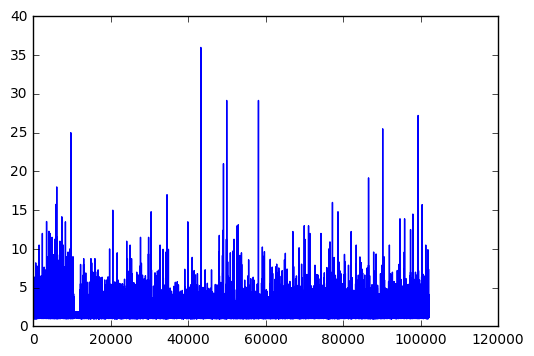

In [558]:
plt.plot(range(len(np.array(games_with_odds['K1']))), np.array(games_with_odds['K1']))

In [117]:
len(games_with_odds[games_with_odds['K1'] > games_with_odds['K2']]) / len(games_with_odds)

0.15231509143803076

Букмекеры ошибаются в 15% случаев

In [118]:
games_mistakes = games_with_odds[games_with_odds['K1'] > games_with_odds['K2']]

Какой-то бред

In [129]:
games_mistakes.head(1)

,ID_B_O,ID1_O,ID2_O,ID_T_O,ID_R_O,K1,K2,TOTAL,KTM,KTB,...,K32,K23,K13,K03,ID1_G,ID2_G,ID_T_G,ID_R_G,RESULT_G,DATE_G
57,2,4010,431,3810,4,2.06,1.862,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4010,431,3810,4,7-5 6-4 6-1,08/28/06 00:00:00


In [559]:
test_games_with_odds = games_mistakes.tail(10000)

In [560]:
id1 = np.array(test_games_with_odds['ID1_G'])
id2 = np.array(test_games_with_odds['ID2_G'])
k1 = np.array(test_games_with_odds['K1'])
k2 = np.array(test_games_with_odds['K2'])

In [562]:
y_pred = []
for i1, i2 in zip(id1, id2):
    y_pred.append(win_probability(ratings[i1], ratings[i2]))

In [563]:
accuracy_score(get_classes(y_pred, 0.5), np.array([1] * len(y_pred)))

0.27579999999999999

In [564]:
np.mean(k1)

2.8216972976040005

In [565]:
np.mean(k2)

1.5601085004189998

Посчитаем метрики когда играем против букмекеров

In [566]:
games_with_odds.tail(1000)

,ID_B_O,ID1_O,ID2_O,ID_T_O,ID_R_O,K1,K2,TOTAL,KTM,KTB,...,K32,K23,K13,K03,ID1_G,ID2_G,ID_T_G,ID_R_G,RESULT_G,DATE_G
101091,2,26923,29939,13894,5,1.990,1.833,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,26923,29939,13894,5,7-5 1-6 7-5,03/16/17 00:00:00
101092,1,26923,29939,13894,5,2.090,1.760,22.5,1.909,1.909,...,NaN,NaN,NaN,NaN,26923,29939,13894,5,7-5 1-6 7-5,03/16/17 00:00:00
101093,2,11373,7345,13896,5,1.328,3.400,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,11373,7345,13896,5,6-2 6-4,03/16/17 00:00:00
101094,1,11373,7345,13896,5,1.330,3.380,21.5,1.960,1.860,...,NaN,NaN,NaN,NaN,11373,7345,13896,5,6-2 6-4,03/16/17 00:00:00
101095,2,28073,26473,13896,5,1.385,3.070,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,28073,26473,13896,5,6-3 2-6 7-6(5),03/16/17 00:00:00
101096,1,28073,26473,13896,5,1.400,3.000,22.0,1.930,1.890,...,NaN,NaN,NaN,NaN,28073,26473,13896,5,6-3 2-6 7-6(5),03/16/17 00:00:00
101097,1,12495,22437,13896,5,1.260,3.940,21.0,1.930,1.890,...,NaN,NaN,NaN,NaN,12495,22437,13896,5,6-3 6-1,03/16/17 00:00:00
101098,2,12495,22437,13896,5,1.256,3.970,20.5,1.935,1.885,...,NaN,NaN,NaN,NaN,12495,22437,13896,5,6-3 6-1,03/16/17 00:00:00
101099,1,23640,10507,13896,5,1.830,2.000,23.0,1.900,1.920,...,NaN,NaN,NaN,NaN,23640,10507,13896,5,4-6 6-4 7-6(6),03/16/17 00:00:00
101100,2,23640,10507,13896,5,1.952,1.870,23.0,1.870,1.952,...,NaN,NaN,NaN,NaN,23640,10507,13896,5,4-6 6-4 7-6(6),03/16/17 00:00:00


In [567]:
games_with_odds_test = games_with_odds.tail(1000)

In [568]:
id1 = np.array(games_with_odds_test['ID1_G'])
id2 = np.array(games_with_odds_test['ID2_G'])
k1 = np.array(games_with_odds_test['K1'])
k2 = np.array(games_with_odds_test['K2'])

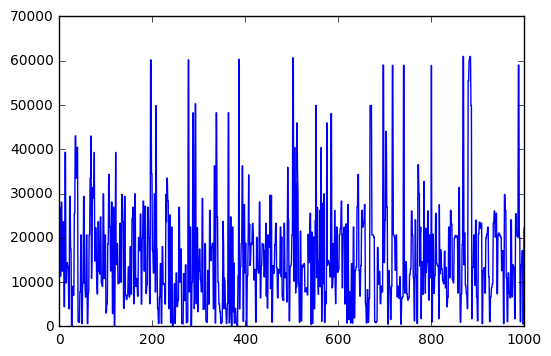

In [582]:
plt.plot(range(len(id1)), id1)

Маржа букмекера

In [569]:
print ('{} %'.format(np.mean(1/k1 + 1/k2 -1) * 100))

3.9587830742917203 %


In [571]:
bookmaker_prob = 1 - k1 / (k1 + k2)

In [572]:
bookmaker_prob

array([ 0.47946638,  0.45714287,  0.71912015,  0.71762208,  0.68911335,
        0.68181818,  0.75769231,  0.75966322,  0.52219321,  0.48927263,
        0.58629441,  0.58703938,  0.55813954,  0.56443299,  0.65801886,
        0.74274275,  0.5       ,  0.51184109,  0.36363636,  0.38305253,
        0.38366336,  0.28909953,  0.57908163,  0.58703938,  0.32008831,
        0.3203021 ,  0.60000001,  0.60317461,  0.46354167,  0.43985544,
        0.49214659,  0.52273916,  0.59748427,  0.59403438,  0.44303797,
        0.47886959,  0.37163815,  0.43799948,  0.26530612,  0.41296062,
        0.63120569,  0.58415841,  0.71762208,  0.76311305,  0.43187659,
        0.43187659,  0.75769231,  0.75769231,  0.63636364,  0.63426488,
        0.68027211,  0.65643447,  0.47012987,  0.40596562,  0.4934555 ,
        0.484375  ,  0.56463976,  0.55498722,  0.78671328,  0.77429983,
        0.43478261,  0.35344826,  0.74656189,  0.70410367,  0.73903466,
        0.7420635 ,  0.58438287,  0.59222082,  0.52331606,  0.53

In [573]:
octoprob = []
for i1, i2 in zip(id1, id2):
    octoprob.append(win_probability(ratings[i1], ratings[i2]))

In [579]:
len(bookmaker_prob)

1000

In [580]:
len(octoprob)

1000

In [593]:
bbbl = []

In [594]:
cnt = 0
cnt_bet = 0
bablo = 1
i = 0
for o, b in zip(octoprob, bookmaker_prob):
    o_c = 1 if o > 0.5 else 0.
    b_c = 1 if b > 0.5 else 0.
    if o_c != b_c:
#         print (o, b)
        cnt_bet += 1
        cnt += o_c == 1
        if o_c == 1:
            bablo += k1[i] - 1
        else:
            bablo -= 1
    bbbl.append(bablo)
    i += 1
#     print (bablo)
print (bablo, bablo / cnt)

13.36099939 0.137742261753


In [595]:
bbbl = np.array(bbbl)

In [596]:
max(bbbl)

23.180999799999995

# Отрисуем график заработанного бабла

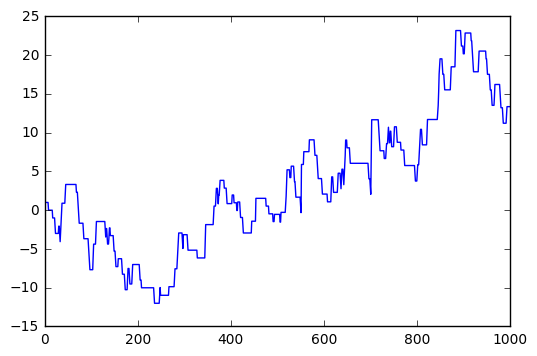

In [597]:
plt.plot(range(len(bbbl)),bbbl)

In [535]:
cnt

97

In [536]:
cnt_bet

225

In [537]:
cnt / cnt_bet

0.4311111111111111

# глупые алгоритмы которые должны терять деньги

In [538]:
cnt = 0
cnt_bet = 0
bablo = 1
i = 0
for o, b in zip(octoprob, bookmaker_prob):
    if not np.isnan(k1[i]) and not np.isnan(k2[i]):
        o_c = 1 if o > 0.5 else 0.
        b_c = 1 if b > 0.5 else 0.
        cnt_bet += 1
        cnt += o_c == 1
        if o_c == 1:
            bablo += k1[i]  - 1
        else:
            bablo -= 1
        i += 1
#         print (bablo, k1[i], k2[i], not np.isnan(k1[i]) and not np.isnan(k2[i]))
print (bablo, bablo / cnt)

-18.63600215 -0.0295809557937


In [539]:
cnt = 0
cnt_bet = 0
bablo = 1
i = 0
for o, b in zip(octoprob, bookmaker_prob):
    if not np.isnan(k1[i]) and not np.isnan(k2[i]):
        o_c = 1 if k1[i] > k2[i] else 0
        cnt_bet += 1
        cnt += o_c == 1
        if o_c == 1:
            bablo += k1[i] - 1
        else:
            bablo -= 1
        i += 1
#         print (bablo, k1[i], k2[i], not np.isnan(k1[i]) and not np.isnan(k2[i]))
print (bablo, bablo / cnt)

-96.9270016 -0.298236928


In [540]:
cnt = 0
cnt_bet = 0
bablo = 1
i = 0
for o, b in zip(octoprob, bookmaker_prob):
    if not np.isnan(k1[i]) and not np.isnan(k2[i]):
        o_c = 1 if k1[i] < k2[i] else 0
        cnt_bet += 1
        cnt += o_c == 1
        if o_c == 1:
            bablo += k1[i] - 1
        else:
            bablo -= 1
        i += 1
#         print (bablo, k1[i], k2[i], not np.isnan(k1[i]) and not np.isnan(k2[i]))
print (bablo, bablo / cnt)

-52.3570011 -0.0792087762481


In [541]:
print (cnt, cnt_bet)

661 1000
